In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as skt

In [ ]:
path = '/content/drive/My Drive/bases_capes_cursos/cursos_2013-2019.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


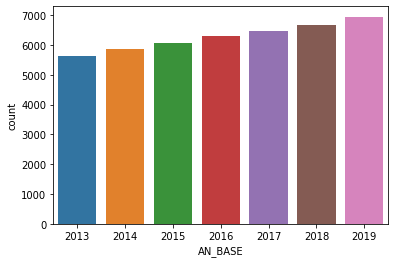

In [ ]:
sns.countplot(x='AN_BASE', data = df)

In [ ]:
df.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,DS_DEPENDENCIA_ADMINISTRATIVA,DS_ORGANIZACAO_ACADEMICA,NM_REGIAO,SG_UF_PROGRAMA,NM_MUNICIPIO_PROGRAMA_IES,CD_PROGRAMA_IES,NM_PROGRAMA_IES,CD_CURSO_PPG,NM_CURSO,NM_GRAU_CURSO,CD_CONCEITO_CURSO,AN_INICIO_PREVISTO,DS_SITUACAO_CURSO,DT_SITUACAO_CURSO,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA
0,2013,CIÊNCIAS AGRÁRIAS,AGRONOMIA,NÃO SE APLICA,NÃO SE APLICA,42,CIÊNCIAS AGRÁRIAS I,41002016,43,UDESC,UNIVERSIDADE DO ESTADO DE SANTA CATARINA,ESTADUAL,PÚBLICA,NÃO INFORMADO,SUL,SC,LAGES,41002016003P1,CIENCIA DO SOLO,41002016003D2,CIENCIA DO SOLO,DOUTORADO,5,2008,EM FUNCIONAMENTO,28FEB2014:00:00:00,113412,50194
1,2013,CIÊNCIAS DA SAÚDE,SAÚDE COLETIVA,NÃO SE APLICA,NÃO SE APLICA,22,SAÚDE COLETIVA,32005016,576,UFJF,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,FEDERAL,PÚBLICA,NÃO INFORMADO,SUDESTE,MG,JUIZ DE FORA,32005016021P3,SAÚDE COLETIVA,32005016021M3,SAÚDE COLETIVA,MESTRADO,4,2007,EM FUNCIONAMENTO,18SEP2012:00:00:00,112193,49128
2,2013,CIÊNCIAS DA SAÚDE,EDUCAÇÃO FÍSICA,NÃO SE APLICA,NÃO SE APLICA,21,EDUCAÇÃO FÍSICA,33072019,203,USJT,UNIVERSIDADE SÃO JUDAS TADEU,PARTICULAR,PRIVADA,UNIVERSIDADE,SUDESTE,SP,SÃO PAULO,33072019002P5,EDUCAÇÃO FÍSICA,33072019002D6,EDUCAÇÃO FÍSICA,DOUTORADO,3,2010,EM FUNCIONAMENTO,11MAR2011:00:00:00,112743,49561
3,2013,CIÊNCIAS SOCIAIS APLICADAS,DIREITO,TEORIA DO DIREITO,NÃO SE APLICA,26,DIREITO,31005012,528,PUC-RIO,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,PARTICULAR,PRIVADA,UNIVERSIDADE,SUDESTE,RJ,RIO DE JANEIRO,31005012020P4,DIREITO,31005012020M4,DIREITO,MESTRADO,4,1972,EM FUNCIONAMENTO,18SEP2012:00:00:00,112124,49039
4,2013,CIÊNCIAS DA SAÚDE,MEDICINA,CLÍNICA MÉDICA,CANCEROLOGIA,15,MEDICINA I,31061010,NI,INCA,INSTITUTO NACIONAL DE CÂNCER,FEDERAL,PÚBLICA,NÃO INFORMADO,SUDESTE,RJ,RIO DE JANEIRO,31061010001P9,ONCOLOGIA,31061010001M9,ONCOLOGIA,MESTRADO,6,2005,EM FUNCIONAMENTO,18SEP2012:00:00:00,113692,50473


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43988 entries, 0 to 43987
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AN_BASE                        43988 non-null  int64 
 1   NM_GRANDE_AREA_CONHECIMENTO    43988 non-null  object
 2   NM_AREA_CONHECIMENTO           43988 non-null  object
 3   NM_SUBAREA_CONHECIMENTO        43988 non-null  object
 4   NM_ESPECIALIDADE               43988 non-null  object
 5   CD_AREA_AVALIACAO              43988 non-null  int64 
 6   NM_AREA_AVALIACAO              43988 non-null  object
 7   CD_ENTIDADE_CAPES              43988 non-null  int64 
 8   CD_ENTIDADE_EMEC               43988 non-null  object
 9   SG_ENTIDADE_ENSINO             43988 non-null  object
 10  NM_ENTIDADE_ENSINO             43988 non-null  object
 11  CS_STATUS_JURIDICO             43988 non-null  object
 12  DS_DEPENDENCIA_ADMINISTRATIVA  43988 non-null  object
 13  D

In [ ]:
df['DS_SITUACAO_CURSO'].unique()

array(['EM FUNCIONAMENTO', 'EM PROJETO', 'EM DESATIVACAO'], dtype=object)

In [ ]:
df = df.drop(columns=['NM_AREA_CONHECIMENTO', 'NM_SUBAREA_CONHECIMENTO','NM_ESPECIALIDADE','CD_ENTIDADE_CAPES', 'CD_ENTIDADE_EMEC', 'SG_ENTIDADE_ENSINO', 'NM_ENTIDADE_ENSINO', 'CS_STATUS_JURIDICO', 'DS_DEPENDENCIA_ADMINISTRATIVA','DS_ORGANIZACAO_ACADEMICA', 'NM_REGIAO', 'SG_UF_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES', 'ID_ADD_FOTO_PROGRAMA_IES', 'ID_ADD_FOTO_PROGRAMA'])
df.head()

#chaves com docentes: CD_area_avaliacao , CD_programa_IES

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_PROGRAMA_IES,NM_PROGRAMA_IES,CD_CURSO_PPG,NM_CURSO,NM_GRAU_CURSO,CD_CONCEITO_CURSO,AN_INICIO_PREVISTO,DS_SITUACAO_CURSO,DT_SITUACAO_CURSO
0,2013,CIÊNCIAS AGRÁRIAS,42,CIÊNCIAS AGRÁRIAS I,41002016003P1,CIENCIA DO SOLO,41002016003D2,CIENCIA DO SOLO,DOUTORADO,5,2008,EM FUNCIONAMENTO,28FEB2014:00:00:00
1,2013,CIÊNCIAS DA SAÚDE,22,SAÚDE COLETIVA,32005016021P3,SAÚDE COLETIVA,32005016021M3,SAÚDE COLETIVA,MESTRADO,4,2007,EM FUNCIONAMENTO,18SEP2012:00:00:00
2,2013,CIÊNCIAS DA SAÚDE,21,EDUCAÇÃO FÍSICA,33072019002P5,EDUCAÇÃO FÍSICA,33072019002D6,EDUCAÇÃO FÍSICA,DOUTORADO,3,2010,EM FUNCIONAMENTO,11MAR2011:00:00:00
3,2013,CIÊNCIAS SOCIAIS APLICADAS,26,DIREITO,31005012020P4,DIREITO,31005012020M4,DIREITO,MESTRADO,4,1972,EM FUNCIONAMENTO,18SEP2012:00:00:00
4,2013,CIÊNCIAS DA SAÚDE,15,MEDICINA I,31061010001P9,ONCOLOGIA,31061010001M9,ONCOLOGIA,MESTRADO,6,2005,EM FUNCIONAMENTO,18SEP2012:00:00:00


In [ ]:
x = df['CD_CURSO_PPG'].count()

In [ ]:
print(x)

43988


In [ ]:
# Tratar dados para eventualmente termos uma media de conceitos de curso por programa

df['CD_CONCEITO_CURSO'].unique()

array([5, 4, 3, 6, 7, -1, 2, 1, '7', '4', '3', '5', '6', '2', '1', 'A'],
      dtype=object)

In [ ]:
df1 = df[df['CD_CONCEITO_CURSO'] != 'A']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43715 entries, 0 to 43987
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   AN_BASE                      43715 non-null  int64 
 1   NM_GRANDE_AREA_CONHECIMENTO  43715 non-null  object
 2   CD_AREA_AVALIACAO            43715 non-null  int64 
 3   NM_AREA_AVALIACAO            43715 non-null  object
 4   CD_PROGRAMA_IES              43715 non-null  object
 5   NM_PROGRAMA_IES              43715 non-null  object
 6   CD_CURSO_PPG                 43715 non-null  object
 7   NM_CURSO                     43715 non-null  object
 8   NM_GRAU_CURSO                43715 non-null  object
 9   CD_CONCEITO_CURSO            43715 non-null  object
 10  AN_INICIO_PREVISTO           43715 non-null  int64 
 11  DS_SITUACAO_CURSO            43715 non-null  object
 12  DT_SITUACAO_CURSO            43715 non-null  object
dtypes: int64(3), object(10)
memory 

In [ ]:
df1['CD_CONCEITO_CURSO'].unique()

array([5, 4, 3, 6, 7, -1, 2, 1, '7', '4', '3', '5', '6', '2', '1'],
      dtype=object)

In [ ]:
df1.CD_CONCEITO_CURSO = df1.CD_CONCEITO_CURSO.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1['CD_CONCEITO_CURSO'].unique()

array([ 5,  4,  3,  6,  7, -1,  2,  1])

In [ ]:
df1 = df1[df1['CD_CONCEITO_CURSO'] != -1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43646 entries, 0 to 43987
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   AN_BASE                      43646 non-null  int64 
 1   NM_GRANDE_AREA_CONHECIMENTO  43646 non-null  object
 2   CD_AREA_AVALIACAO            43646 non-null  int64 
 3   NM_AREA_AVALIACAO            43646 non-null  object
 4   CD_PROGRAMA_IES              43646 non-null  object
 5   NM_PROGRAMA_IES              43646 non-null  object
 6   CD_CURSO_PPG                 43646 non-null  object
 7   NM_CURSO                     43646 non-null  object
 8   NM_GRAU_CURSO                43646 non-null  object
 9   CD_CONCEITO_CURSO            43646 non-null  int64 
 10  AN_INICIO_PREVISTO           43646 non-null  int64 
 11  DS_SITUACAO_CURSO            43646 non-null  object
 12  DT_SITUACAO_CURSO            43646 non-null  object
dtypes: int64(4), object(9)
memory u

In [ ]:
df1['CD_CONCEITO_CURSO'].unique()

array([5, 4, 3, 6, 7, 2, 1])

In [ ]:
df1['CD_CURSO_PPG'].unique()

array(['41002016003D2', '32005016021M3', '33072019002D6', ...,
       '33052018007D4', '33076014001M4', '33052018007M3'], dtype=object)

In [ ]:
#utilizei o 'nunique' para contar valor distintos em codigo de curso - alternativa mais lenta pd.Series.nunique

df2 = df1.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'CD_AREA_AVALIACAO': np.mean, 'CD_CURSO_PPG': "nunique", 'CD_CONCEITO_CURSO': np.mean})


In [ ]:
# Duvida: está retornando realmente a quantidade de cursos unicos por programa ano?
# média de conceito-curso por programa-ano

df2.head(100)

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CD_CURSO_PPG,CD_CONCEITO_CURSO
0,10001018002P1,2013,9,2,3.0
1,10001018002P1,2014,9,2,3.0
2,10001018002P1,2015,9,2,3.0
3,10001018002P1,2016,9,2,3.0
4,10001018002P1,2017,9,2,4.0
...,...,...,...,...,...
95,11001011003P0,2018,41,2,4.0
96,11001011003P0,2019,41,2,4.0
97,11001011004P7,2013,42,2,3.5
98,11001011004P7,2014,42,2,3.5


In [ ]:
df2['CD_CURSO_PPG'].unique()

array([2, 1])

In [ ]:
df2['CD_AREA_AVALIACAO'].unique()

array([ 9, 45, 36, 27, 41, 37, 38, 49, 46,  7, 42, 22, 24, 16,  4, 25,  3,
        5, 13,  2, 48,  1, 14, 10, 40, 34, 23, 32, 35, 31, 19, 47, 18, 17,
       29,  6, 26, 15, 30, 39, 12,  8, 28, 11, 20, 33, 44, 21, 50])

In [ ]:
df3 = df1.groupby('CD_PROGRAMA_IES',as_index=False).agg({'CD_AREA_AVALIACAO': np.max, 'CD_CURSO_PPG': "nunique", 'CD_CONCEITO_CURSO': np.mean})

In [ ]:
# média de conceito-curso por programa
df3.head(100)

,CD_PROGRAMA_IES,CD_AREA_AVALIACAO,CD_CURSO_PPG,CD_CONCEITO_CURSO
0,10001018002P1,9,2,3.428571
1,10001018004P4,45,2,4.000000
2,10001018005P0,36,2,4.000000
3,10001018006P7,27,1,3.571429
4,10001018008P0,41,1,2.000000
...,...,...,...,...
95,13001019007P1,45,1,3.000000
96,13001019008P8,45,1,3.000000
97,13001019009P4,30,1,3.000000
98,13001019039P0,35,1,3.000000


To-do: 

1.   Fazer a analise exploratoria da base de **cursos**

Done:

1.   Quantidade de cursos por programa-ano - ok
2.   Media de conceito dos cursos por programa-ano - ok
3.   Agregar conceito-curso por programa-ano & qtde de cursos/programa-ano em docentes - ok

Dúvida:


> Devo fazer uma feature de DS_SITUACAO_CURSO ?




Considerações:

Extraímos desta base informações quantitativas pois algumas informações ou são muito específicas a nivel de curso ou já teremos na base de programas.


In [ ]:
df2.to_csv(r'/content/drive/My Drive/bases_capes_cursos/cursos_features.csv', index=False)